## 2. Prepare data

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# gzip library import
import gzip

import numpy as np
import pandas as pd
from sklearn import datasets, model_selection

from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
# FASHION-MNIST image data
with open('./data/fashion-mnist/train-images-idx3-ubyte', 'rb') as f:
    mnist_data = np.frombuffer(f.read(), np.uint8, offset=16)
    mnist_data = mnist_data.reshape(-1, 784)

In [3]:
# normalize
mnist_data = mnist_data / 255

# pandas
pd.DataFrame(mnist_data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,0.0,0.0,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.086275,...,0.000000,0.000000,0.000000,0.000000,0.521569,0.654902,0.286275,0.000000,0.0,0.0
6,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,0.0,0.0,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011765,0.000000,0.321569,0.929412,0.905882,0.274510,0.0,0.0
8,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


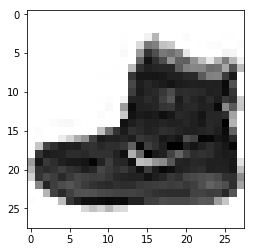

In [4]:
# first image
plt.imshow(mnist_data[0].reshape(28, 28), cmap=cm.gray_r)
plt.show()

In [5]:
# label data
with open('./data/fashion-mnist/train-labels-idx1-ubyte', 'rb') as f:
    mnist_label = np.frombuffer(f.read(), np.uint8, offset=8)

mnist_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
train_size = 5000
test_size = 500

# data partitioning
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(
    mnist_data, mnist_label, train_size=train_size,test_size=test_size)

In [7]:
# 1x784 vector -> 28x28 matrix
train_X = train_X.reshape((len(train_X), 1, 28, 28))
test_X = test_X.reshape((len(test_X), 1, 28, 28))

## 3. Make Tensor

In [8]:
# train data -> Tensor
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()

# test data -> Tensor
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

# check
print(train_X.shape)
print(train_Y.shape)

torch.Size([5000, 1, 28, 28])
torch.Size([5000])


In [9]:
# Merge
train = TensorDataset(train_X, train_Y)

# first data
print(train[0])

# split minibatch
train_loader = DataLoader(train, batch_size=100, shuffle=True)

(tensor([[[0.0000, 0.0000, 0.0039, 0.0039, 0.0078, 0.0000, 0.0000, 0.3216,
          0.5451, 0.7725, 0.5647, 0.1255, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.3529, 0.7529, 0.4510, 0.0314, 0.0000, 0.0000,
          0.0078, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.1725, 0.8275, 0.7725,
          0.6941, 0.7922, 0.8745, 0.8902, 0.7686, 0.6471, 0.5412, 0.5843,
          0.7176, 0.8784, 0.8980, 0.9020, 0.7137, 0.8314, 0.6353, 0.0588,
          0.0000, 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039, 0.0000, 0.0392, 0.7059, 0.7373, 0.6863,
          0.6863, 0.7020, 0.8824, 0.8824, 0.8745, 0.8902, 0.9059, 0.9216,
          0.9098, 0.9294, 0.9569, 0.7686, 0.6392, 0.6784, 0.7255, 0.6941,
          0.1373, 0.0000, 0.0078, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.4902, 0.7725, 0.6902, 0.7137,
          0.6941, 0.6353, 0.7255, 0.9294, 0.9490, 0.9529, 0.9569, 0.9529,
          0.9490, 0.9490, 0.7961, 0.5804, 0.6902, 0.6745

## 4. Build NN

In [10]:
# NN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # conv_layer
        self.conv1 = nn.Conv2d(1, 6, 5) # input, output, filter size
        self.conv2 = nn.Conv2d(6, 16, 5)
        # fully connected layer
        self.fc1 = nn.Linear(256, 64) # 256 = (((28-5+1)/2 )-5+1)/2 * (((28-5+1)/2 )-5+1)/2 * 16
        self.fc2 = nn.Linear(64, 10)
    
    def forward(self, x):
        # pooling layer
        x = F.max_pool2d(F.relu(self.conv1(x)), 2) # pooling size
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
# instance
model = Net()

## 5. Model fitting

In [11]:
# Loss func object
criterion = nn.CrossEntropyLoss()

# Optimization object
optimizer = optim.SGD(model.parameters(), lr=0.01)

# ftting
for epoch in range(300):
    total_loss = 0
    # data call
    for train_x, train_y in train_loader:
        # Calc Graph Configuration
        train_x, train_y = Variable(train_x), Variable(train_y)
        # Slope Initialization
        optimizer.zero_grad()
        # calc FP
        output = model(train_x)
        # calc loss
        loss = criterion(output, train_y)
        # calc BP
        loss.backward()
        # update weights
        optimizer.step()
        # Calc cumulative losses
        total_loss += loss.item()
    # print cum_loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)

100 23.180313885211945
200 15.02289992570877
300 10.587595261633396


In [12]:
# Calc Graph Configuration
test_x, test_y = Variable(test_X), Variable(test_Y)
# Have output to be 0 or 1
result = torch.max(model(test_x).data, 1)[1]
# measure accuracy of model
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())

accuracy

0.872